<a href="https://colab.research.google.com/github/SibbiesMom23/AI-Network-Anomaly-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.856

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       221
           1       0.00      0.00      0.00        29

    accuracy                           0.86       250
   macro avg       0.44      0.48      0.46       250
weighted avg       0.78      0.86      0.82       250



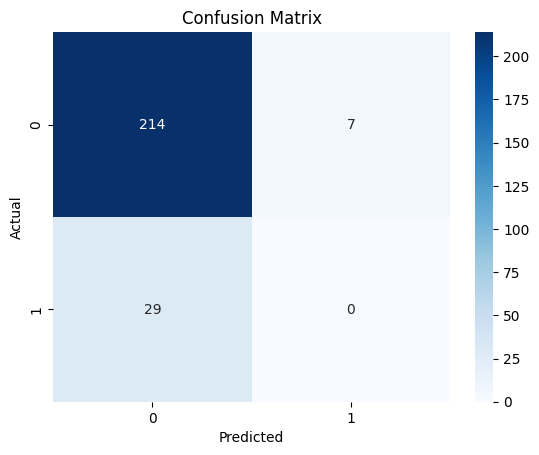

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Create Synthetic Dataset
# -----------------------------

np.random.seed(42)
data_size = 1000

df = pd.DataFrame({
    "packet_size": np.random.normal(500, 120, data_size),
    "duration": np.random.exponential(0.8, data_size),
    "src_bytes": np.random.normal(200, 50, data_size),
    "dst_bytes": np.random.normal(250, 55, data_size),
    "is_anomaly": np.random.choice([0, 1], size=data_size, p=[0.85, 0.15])
})

# -----------------------------
# 2. Train/Test Split
# -----------------------------

X = df.drop("is_anomaly", axis=1)
y = df["is_anomaly"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 3. Train Random Forest Model
# -----------------------------

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 4. Predictions & Evaluation
# -----------------------------

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
